# Elite runners stadistics:
- how age affects them
- 

In [16]:
# !pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# read the dataset
df_marathon = pd.read_csv('../Data/marathon_results_2015.csv')

In [26]:
# Time data stored as string "0:14:43"
print(type(df_marathon['5K'][0]))

# List of columns to replace "-" with "24:00:00"
columns_to_replace = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time']

# Replace "-" with "24:00:00" in the specified columns
df_marathon[columns_to_replace] = df_marathon[columns_to_replace].replace('-', '24:00:00')

# Convert the specified columns to a timedelta type
df_marathon[columns_to_replace] = df_marathon[columns_to_replace].apply(pd.to_timedelta)

# Sort the dataframe by the '5K' column in descending order
df_marathon_sorted = df_marathon.sort_values(by='5K', ascending=True)

# Print the top 10 rows
# print(df_marathon_sorted["5K"].head(10))


<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [ ]:
# Filter the dataframe to include only runners with 5K time less than 16 minutes
time_minuts_ranges = [18,25,500]

df_elite_runners = df_marathon_sorted[df_marathon_sorted['5K'] < pd.Timedelta(minutes=time_minuts_ranges[0])]
df_hobby_runners = df_marathon_sorted[(df_marathon_sorted['5K'] >= pd.Timedelta(minutes=time_minuts_ranges[0])) & 
                                      (df_marathon_sorted['5K'] < pd.Timedelta(minutes=time_minuts_ranges[1]))]
df_new_runners = df_marathon_sorted[(df_marathon_sorted['5K'] >= pd.Timedelta(minutes=time_minuts_ranges[1])) & 
                                    (df_marathon_sorted['5K'] < pd.Timedelta(days=1))]

In [22]:
# Assuming df_elite_runners is your DataFrame with elite runners' times in a column named '5K'
elite_times = df_elite_runners['5K'].dt.total_seconds()  # Convert to seconds for easier calculation

# Calculate mean and standard deviation
mean_time = elite_times.mean()
std_dev_time = elite_times.std()

# Generate a normal distribution with the calculated mean and standard deviation
normal_distribution = np.random.normal(loc=mean_time, scale=std_dev_time, size=1000)

# Convert the generated times back to timedelta if needed
normal_distribution_timedelta = pd.to_timedelta(normal_distribution, unit='s')

print(normal_distribution_timedelta)
print(f"Mean time: {mean_time} seconds")
print(f"Standard deviation: {std_dev_time} seconds")

# Assuming df_elite_runners, df_hobby_runners, and df_new_runners are your DataFrames
elite_times = df_elite_runners['Official Time'].dt.total_seconds()
hobby_times = df_hobby_runners['Official Time'].dt.total_seconds()
new_times = df_new_runners['Official Time'].dt.total_seconds()

# Calculate mean and standard deviation for each group
mean_times = [elite_times.mean(), hobby_times.mean(), new_times.mean()]
std_dev_times = [elite_times.std(), hobby_times.std(), new_times.std()]

TimedeltaIndex(['0 days 00:18:31.947888082', '0 days 00:17:34.353822345',
                '0 days 00:17:29.029926526', '0 days 00:17:02.771814304',
                '0 days 00:17:15.230970295', '0 days 00:17:27.730432887',
                '0 days 00:16:27.604455299', '0 days 00:16:46.728795956',
                '0 days 00:17:04.816849866', '0 days 00:16:33.276248374',
                ...
                '0 days 00:17:26.435450031', '0 days 00:16:36.991217582',
                '0 days 00:16:27.035023711', '0 days 00:18:32.876351088',
                '0 days 00:16:51.501400980', '0 days 00:18:14.819360545',
                '0 days 00:18:22.693067646', '0 days 00:17:12.550666609',
                '0 days 00:17:47.990210707', '0 days 00:16:38.170274737'],
               dtype='timedelta64[ns]', length=1000, freq=None)
Mean time: 1025.3881278538813 seconds
Standard deviation: 52.19696329933047 seconds


C:\Users\carle\AppData\Local\Temp\ipykernel_17444\3558036437.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data, labels=['Elite Runners', 'Hobby Runners', 'New Runners'])


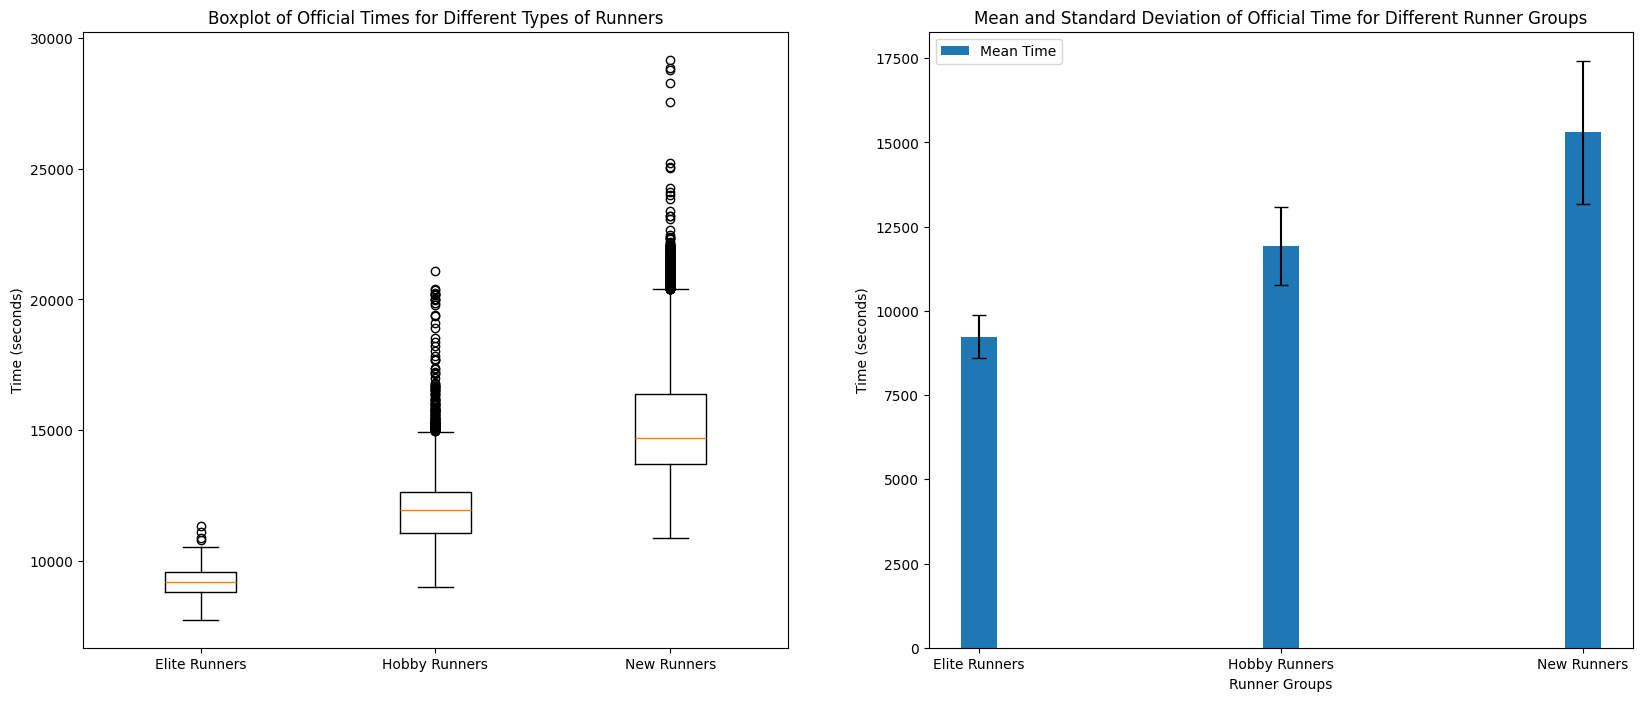

In [33]:
# Define labels for the groups
labels = ['Elite Runners', 'Hobby Runners', 'New Runners']

# Create a bar plot with error bars
x = np.arange(len(labels))
width = 0.12

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Boxplot of Official Times for Different Types of Runners
data = [df_elite_runners['Official Time'].dt.total_seconds(), 
    df_hobby_runners['Official Time'].dt.total_seconds(), 
    df_new_runners['Official Time'].dt.total_seconds()]
ax1.boxplot(data, labels=['Elite Runners', 'Hobby Runners', 'New Runners'])
ax1.set_title('Boxplot of Official Times for Different Types of Runners')
ax1.set_ylabel('Time (seconds)')

# Bar plot with error bars
bars = ax2.bar(x, mean_times, width, yerr=std_dev_times, capsize=5, label='Mean Time')
ax2.set_xlabel('Runner Groups')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Mean and Standard Deviation of Official Time for Different Runner Groups')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

# Show the combined plot
plt.show()
